In [1]:
from imutils import paths # remove this at some point
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import random
import cv2
import os
import numpy as np
import pickle

WIDTH = 60
HEIGHT = 60


Using TensorFlow backend.


In [2]:

data = []
labels = []

imagePaths = sorted(list(paths.list_images("./data/d6only/d6")))
random.seed(42)
random.shuffle(imagePaths)

cv2.startWindowThread()

for path in imagePaths:
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (WIDTH, HEIGHT)).flatten()
    image = image/255.0
    print(image)
    data.append(image)
    labels.append(path.split(os.path.sep)[4].split("_")[1])
    print(path.split(os.path.sep)[4].split("_")[1])

data = np.array(data)
data = data.reshape(len(labels), WIDTH, HEIGHT, 1)
labels = np.array(labels)
print(labels)


[0.64705882 0.63921569 0.63137255 ... 0.41960784 0.41568627 0.43921569]
3
[0.36470588 0.36078431 0.36470588 ... 0.2745098  0.25490196 0.24313725]
2
[0.31764706 0.30196078 0.30588235 ... 0.40392157 0.49019608 0.56470588]
5
[0.23137255 0.23921569 0.23921569 ... 0.23137255 0.24313725 0.23137255]
1
[0.51764706 0.51372549 0.51372549 ... 0.53333333 0.59607843 0.64705882]
4
[0.3254902  0.30588235 0.28627451 ... 0.27058824 0.25882353 0.29019608]
4
[0.7372549  0.7254902  0.64313725 ... 0.31372549 0.36862745 0.38431373]
1
[0.28235294 0.28627451 0.28627451 ... 0.23921569 0.24313725 0.23137255]
1
[0.27058824 0.27058824 0.27843137 ... 0.19215686 0.17647059 0.19215686]
1
[0.4627451  0.39607843 0.33333333 ... 0.39215686 0.39215686 0.38823529]
4
[0.31372549 0.29411765 0.30980392 ... 0.49411765 0.60784314 0.63529412]
3
[0.58039216 0.58431373 0.6        ... 0.43137255 0.40784314 0.4       ]
5
[0.28627451 0.29019608 0.28627451 ... 0.25882353 0.25098039 0.25490196]
1
[0.57647059 0.57254902 0.56862745 ... 

[0.25098039 0.27058824 0.25490196 ... 0.3372549  0.3372549  0.33333333]
4
[0.54509804 0.54509804 0.54509804 ... 0.4        0.4        0.41568627]
1
[0.38431373 0.40392157 0.40392157 ... 0.24705882 0.24313725 0.2627451 ]
1
[0.53333333 0.53333333 0.53333333 ... 0.61176471 0.62352941 0.62745098]
3
[0.63137255 0.61960784 0.60784314 ... 0.44705882 0.44313725 0.44313725]
2
[0.25882353 0.27843137 0.27843137 ... 0.25098039 0.28235294 0.27843137]
6
[0.25098039 0.22352941 0.23137255 ... 0.2627451  0.2627451  0.2627451 ]
5
[0.29019608 0.2745098  0.24705882 ... 0.20784314 0.21960784 0.21960784]
6
[0.56470588 0.5372549  0.49019608 ... 0.34901961 0.38431373 0.42745098]
5
[0.48627451 0.51764706 0.47843137 ... 0.51372549 0.45882353 0.52156863]
5
[0.23921569 0.25882353 0.27058824 ... 0.2745098  0.30196078 0.30588235]
4
[0.47058824 0.45490196 0.47058824 ... 0.43529412 0.42352941 0.43529412]
3
[0.64705882 0.65098039 0.64705882 ... 0.63137255 0.62745098 0.63529412]
2
[0.27843137 0.28627451 0.28627451 ... 

In [3]:
(tX, vX, tY, vY) = train_test_split(data, labels, test_size=0.3, random_state=42)

lb = LabelBinarizer()
lb.fit(tY)
tY = lb.transform(tY)
vY = lb.transform(vY)


In [4]:
model = Sequential()
#model.add(Dense(1024, input_shape=(WIDTH*HEIGHT*3,), activation="sigmoid"))
#model.add(Dense(512, activation="sigmoid"))
model.add(Conv2D(32, kernel_size=10, input_shape=(WIDTH,HEIGHT, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(128, kernel_size=10, activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(512, kernel_size=5, activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(len(lb.classes_)*16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(len(lb.classes_)*8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(len(lb.classes_)*4, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(len(lb.classes_), activation="softmax"))

INIT_LR = 0.01
opt = SGD(lr=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])


In [41]:
EPOCHS = 1
H = model.fit(tX, tY, validation_data=(vX, vY), epochs=EPOCHS, batch_size=8)


Train on 215 samples, validate on 93 samples
Epoch 1/1
215/215 [==============================] - 3s 12ms/step - loss: 0.2385 - acc: 0.9535 - val_loss: 5.6132 - val_acc: 0.3871


[INFO] evaluating network...
              precision    recall  f1-score   support

           1       0.88      1.00      0.93        14
           2       0.92      0.58      0.71        19
           3       0.84      0.70      0.76        23
           4       0.56      0.75      0.64        12
           5       0.43      0.55      0.48        11
           6       0.69      0.79      0.73        14

   micro avg       0.72      0.72      0.72        93
   macro avg       0.72      0.73      0.71        93
weighted avg       0.75      0.72      0.72        93



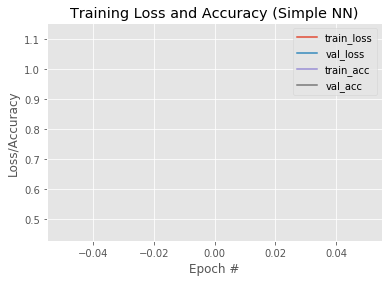

In [26]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(vX, batch_size=32)
print(classification_report(vY.argmax(axis=1),predictions.argmax(axis=1), target_names=lb.classes_))
 
# plot the training loss and accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["acc"], label="train_acc")
plt.plot(N, H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("./out")

In [27]:
# save the model and label binarizer to disk
print("[INFO] serializing network and label binarizer...")
model.save("model")
f = open("label_binarizer", "wb")
f.write(pickle.dumps(lb))
f.close()

[INFO] serializing network and label binarizer...
